In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import textwrap as txt

In [2]:
def simulation():
    global total ##total number of species in each replicate
    global species #number of species
    species=total 
    for x in range(total):
        if random.randint(0,1)==1:
            species+=1
            ###individual divides in 2
        else:
            species-=1
            ##individual dies
    total= species

In [3]:
replicates= 1000 ##number of populations
list2=[]  #will contain data for each replicate population
for j in range(replicates):
    list1=[] #contain totals for each generation for one replicate population
    total=1  #population starts with 1 individual
    species=1
    list1.append(1)
    for i in range(10000):
        simulation()
        list1.append(species)
    list2.append(list1)

        

In [4]:
df = pd.DataFrame(data=list2)  ##creates data table

In [5]:
total_number_of_individuals_list=[]
for i in range(len(list1)):
    total_number_of_individuals= sum(df[i])
    total_number_of_individuals_list.append(total_number_of_individuals)
    
number_of_surviving_populations_list=[]
for j in range(len(list1)):
    number_of_surviving_populations=0
    for i in range(len(list2)):
        if df[j][i]>0:
            number_of_surviving_populations+=1
        else:
            pass
    number_of_surviving_populations_list.append(number_of_surviving_populations)



number_of_surviving_populations_list=pd.Series(data=number_of_surviving_populations_list,name="total_#_of_surviving_populations")
total_number_of_individuals_list= pd.Series(data=total_number_of_individuals_list, name= "total_number_of_individuals")

avg_pop=total_number_of_individuals_list/number_of_surviving_populations_list

average_number_of_individuals_in_extant_populations=pd.Series(data=avg_pop,name="average_number_of_individuals_in_extant_populations")


df3= df.append(number_of_surviving_populations_list, ignore_index= False)
df3=df3.append(total_number_of_individuals_list, ignore_index=False)
data_frame=df3.append(average_number_of_individuals_in_extant_populations, ignore_index=False)


Text(0, 0.5, 'number of individuals')

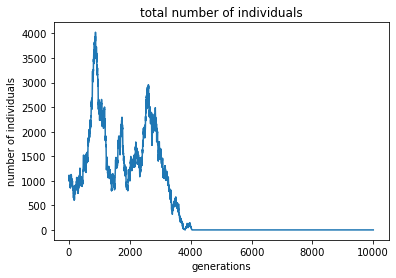

In [6]:
plt.plot(data_frame.loc["total_number_of_individuals"])
plt.title("total number of individuals")
plt.xlabel('generations')
plt.ylabel('number of individuals')


In [7]:
text=txt.fill("The total number of individuals seems to stay roughly the same until eventually the total falls as all the populations become extinct")
print(text)



The total number of individuals seems to stay roughly the same until
eventually the total falls as all the populations become extinct


(0.0, 500.0)

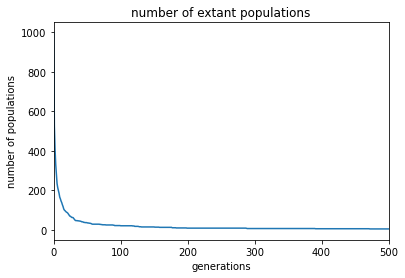

In [8]:
plt.plot(data_frame.loc["total_#_of_surviving_populations"])
plt.title("number of extant populations")
plt.xlabel('generations')
plt.ylabel('number of populations')
plt.xlim([0,500])


In [9]:
text=txt.fill("The number of extant populations quickly decreases as genearations pass. In the first generation only half the populations exist. In the second generation the population size is either 0,2,4 which means theres a high likleyhood of a population getting wipped out. As populations grow larger they become harder to wipe out in one generation, but given enough time all populations will go to zero because of a few unlucky series of generation can cause a population to rapidly decline.")
print(text)

The number of extant populations quickly decreases as genearations
pass. In the first generation only half the populations exist. In the
second generation the population size is either 0,2,4 which means
theres a high likleyhood of a population getting wipped out. As
populations grow larger they become harder to wipe out in one
generation, but given enough time all populations will go to zero
because of a few unlucky series of generation can cause a population
to rapidly decline.


Text(0, 0.5, 'number of individuals')

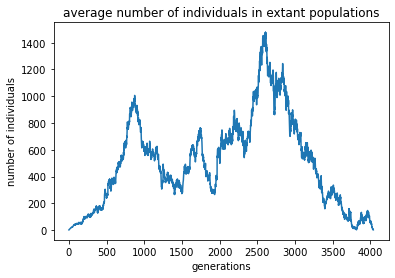

In [10]:
plt.plot(data_frame.loc["average_number_of_individuals_in_extant_populations"])
plt.title("average number of individuals in extant populations")
plt.xlabel('generations')
plt.ylabel('number of individuals')



In [17]:
text=txt.fill("The average number of individuals seems to slowly rise in the begining and this makes sense as there as less extant populations but each one is larger. Any of the small population can easily become wiped out in a few generations. Eventually all the populations must die since they will run into an unlucky streak of individuals failing to reproduce which drives the average number down in the end.")

print(text)

The average number of individuals seems to slowly rise in the begining
and this makes sense as there as less extant populations but each one
is larger. Any of the small population can easily become wiped out in
a few generations. Eventually all the populations must die since they
will run into an unlucky streak of individuals failing to reproduce
which drives the average number down in the end.


In [12]:
gen_list=[]
for i in range(len(list1)):
    gen_num =f"gen_{i}"
    gen_list.append(gen_num)


replicate_list=[]
for j in range(len(list2)):
    replicate=f"replicate_{j}"
    replicate_list.append(replicate)
    
replicate_list.append("total_#_of_surviving_populations")
replicate_list.append("total_number_of_individuals")
replicate_list.append("average_number_of_individuals_in_extant_populations")

    
data_frame.columns= [gen_list]
data_frame.index= [replicate_list]

In [13]:
data_frame #nicer looking dataframe

,gen_0,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,gen_9,...,gen_9991,gen_9992,gen_9993,gen_9994,gen_9995,gen_9996,gen_9997,gen_9998,gen_9999,gen_10000
replicate_0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
replicate_1,1.0,2.0,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
replicate_2,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
replicate_3,1.0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,6.000000,8.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
replicate_4,1.0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,8.000000,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
replicate_998,1.0,2.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
replicate_999,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total_#_of_surviving_populations,1000.0,526.0,409.000000,332.000000,285.000000,235.000000,214.000000,199.000000,185.000000,166.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total_number_of_individuals,1000.0,1052.0,1074.000000,1096.000000,1112.000000,1076.000000,1090.000000,1108.000000,1092.000000,1094.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
note=txt.fill("This problem seems like when in gambling when people always double their bet on a 50/50 probability. Given someone starts with finite money and plays an infininte time, they will eventually run out of money. This is like the population simulation as a population can grow very large but also fall very quick;y. The expected value of the one repilcate population I suspect would be 1 if populations could go into the negative but since they can't all the populations go to zero given enough time as once a population reaches zero it will stay at zero.")
print(note)

This problem seems like when in gambling when people always double
their bet on a 50/50 probability. Given someone starts with finite
money and plays an infininte time, they will eventually run out of
money. This is like the population simulation as a population can grow
very large but also fall very quick;y. The expected value of the one
repilcate population I suspect would be 1 if populations could go into
the negative but since they can't all the populations go to zero given
enough time as once a population reaches zero it will stay at zero.
